In [ ]:
''' Problem Statement
1) Perform descriptive analytics to create a customer profile for each treadmill product by developing appropriate tables and charts.
2) For each treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business
'''

' Problem Statement\n1) Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.\n2) For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business\n'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df=pd.read_csv("")

In [ ]:
df.shape

(180, 9)

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [ ]:
#Checking for null values

In [ ]:
df.isna().sum().sum()

0

In [ ]:
#No Nulls were detected

In [ ]:
# Checking for outliers
# Using boxplot for the same

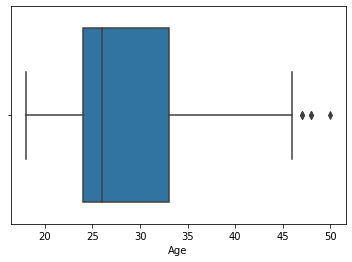

In [ ]:
sns.boxplot(data=df,x="Age")

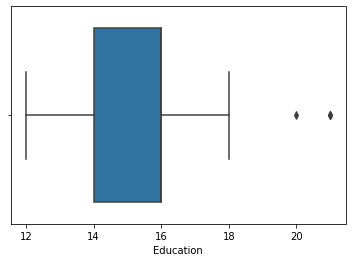

In [ ]:
sns.boxplot(data=df,x="Education")

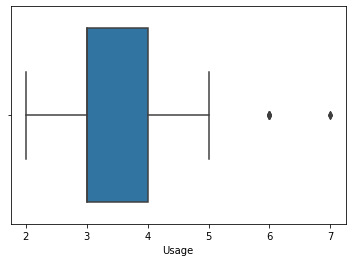

In [ ]:
sns.boxplot(data=df,x="Usage")

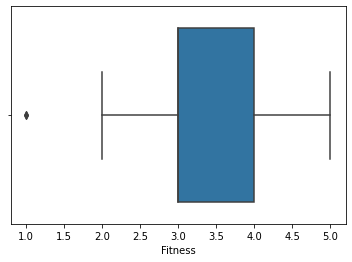

In [ ]:
sns.boxplot(data=df,x="Fitness")

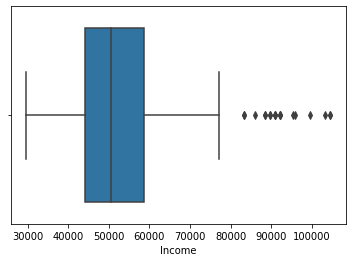

In [ ]:
sns.boxplot(data=df,x="Income")

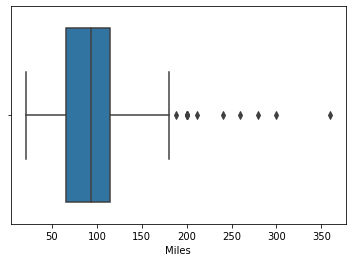

In [ ]:
sns.boxplot(data=df,x="Miles")

In [ ]:
df.groupby("Product")["Income"].mean()

Product
KP281    46418.025
KP481    48973.650
KP781    75441.575
Name: Income, dtype: float64

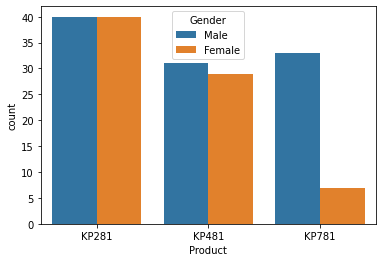

In [ ]:
sns.countplot(data=df,x="Product",hue="Gender")
#For the model KP281, probability of male and female buying are same
#For the model KP481, probability of male buying the same is slightly more than female
#For the model KP781, probability of male buying this model is much larger than female 

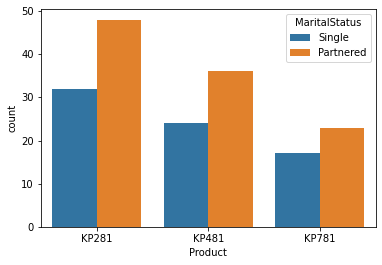

In [ ]:
sns.countplot(data=df,x="Product",hue="MaritalStatus")
#Partnered individual are demanding the equipment more than single individuals

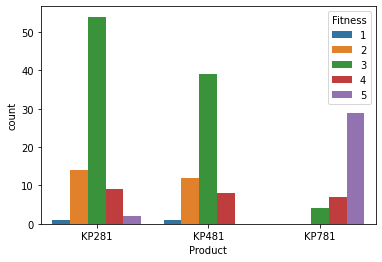

In [ ]:
sns.countplot(data=df,x="Product",hue="Fitness")
#People with highest fitness ie 5 prefer KP781 with highest number of features
#People with moderate fitness buys the highest number of equipments
#People with lowest fitness does not prefer KP781


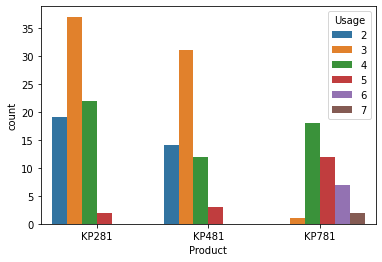

In [ ]:
sns.countplot(data=df,x="Product",hue="Usage")
#People with KP281 and KP481 runner has a high probability of using there equipment 3 times a week
#People with KP781 has a high probability of using there runner 4 times a week

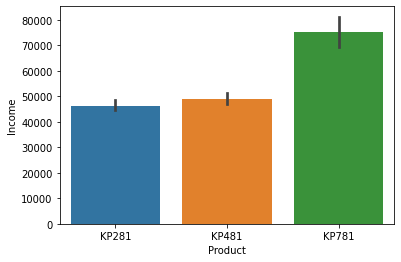

In [ ]:
sns.barplot(data=df,x='Product',y="Income",estimator=np.mean)

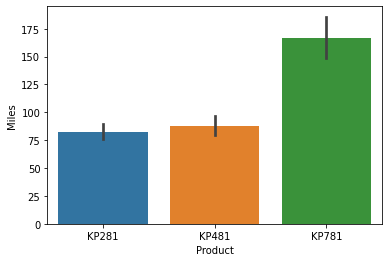

In [ ]:
sns.barplot(data=df,x='Product',y="Miles",estimator=np.mean)
#People with income in the range of 75000 prefer KP781

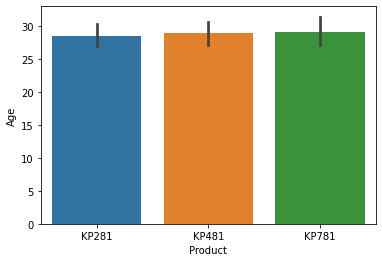

In [ ]:
sns.barplot(data=df,x='Product',y="Age",estimator=np.mean)
#People who runnes more miles prefer KP781

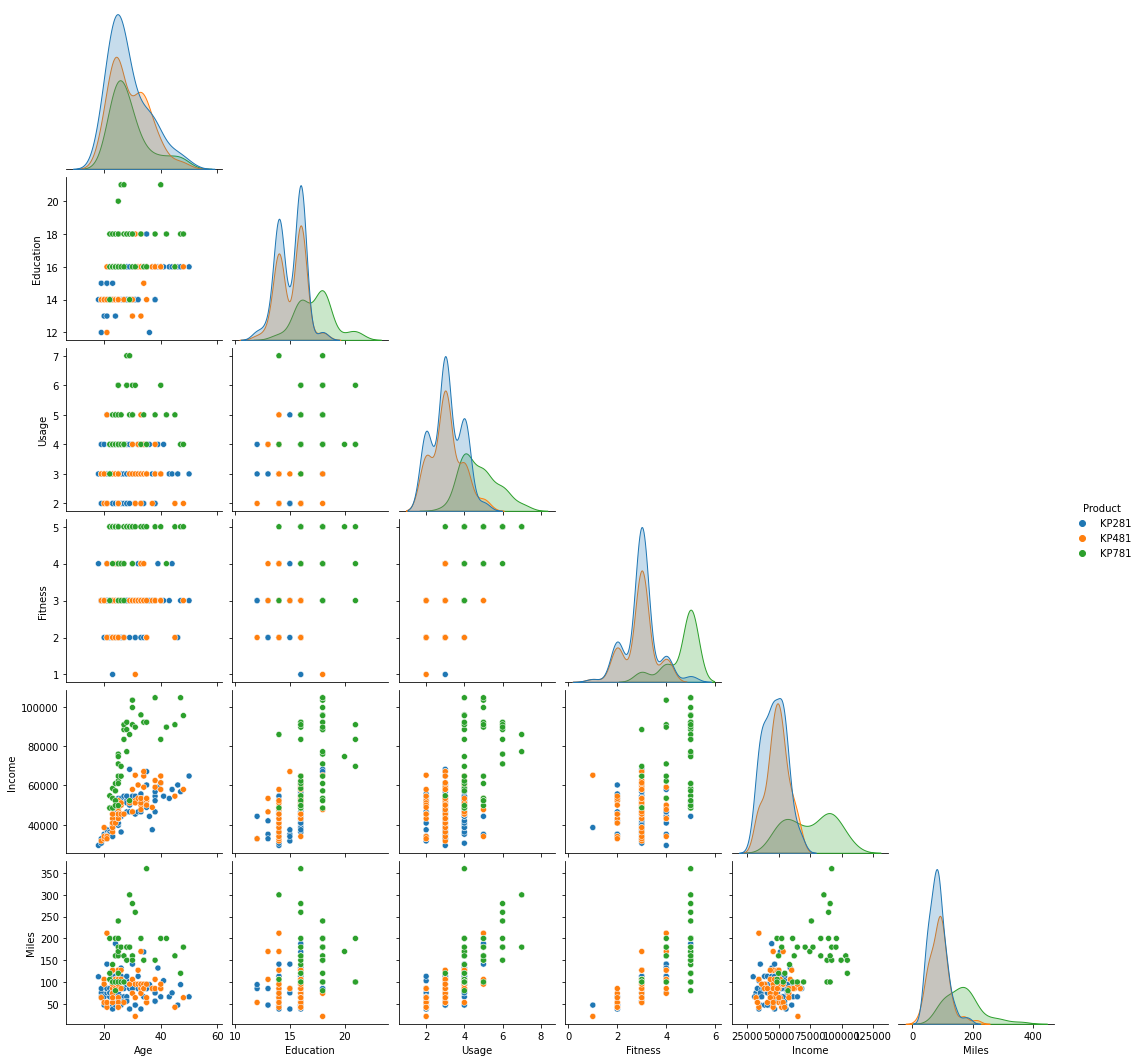

In [ ]:
sns.pairplot(df,hue="Product",corner=True)

In [ ]:
#Probality of buying KP281
len(df[df["Product"]=="KP281"])/len(df)

0.4444444444444444

In [ ]:
#Probality of buying KP481
len(df[df["Product"]=="KP481"])/len(df)

0.3333333333333333

In [ ]:
#Probality of buying KP781
len(df[df["Product"]=="KP781"])/len(df)

0.2222222222222222

In [ ]:
pd.crosstab(index=df["Product"], columns=df["MaritalStatus"])

MaritalStatus,Partnered,Single
Product,,
KP281,48,32
KP481,36,24
KP781,23,17


In [ ]:
#Conditional probability wrt Marital Status
print("P[KP281/Single]=", 32/(32+24+17))
print("P[KP481/Single]=", 24/(32+24+17))
print("P[KP781/Single]=", 17/(32+24+17))

P[KP281/Single]= 0.4383561643835616
P[KP481/Single]= 0.3287671232876712
P[KP781/Single]= 0.2328767123287671


In [ ]:
print("P[KP281/Partnered]=", 48/(48+36+23))
print("P[KP481/Partnered]=", 36/(48+36+23))
print("P[KP781/Partnered]=", 23/(48+36+23))

P[KP281/Partnered]= 0.4485981308411215
P[KP481/Partnered]= 0.3364485981308411
P[KP781/Partnered]= 0.21495327102803738


In [ ]:
df_gender=pd.crosstab(index=df["Product"], columns=df["Gender"])
df_gender.reset_index()

Gender,Product,Female,Male
0,KP281,40,40
1,KP481,29,31
2,KP781,7,33


In [ ]:
#What is the probability of a male customer buying a KP781 treadmill?
# That is buying KP781 given male. P(KP781/M)
33/df_gender["Male"].sum()


0.3173076923076923

In [ ]:
# That is buying KP481 given male. P(KP481/M)
31/df_gender["Male"].sum()

0.2980769230769231

In [ ]:
# That is buying KP281 given male. P(KP281/M)
40/df_gender["Male"].sum()

0.38461538461538464

In [ ]:
pd.crosstab(index=df["Product"], columns=df["Fitness"])

Fitness,1,2,3,4,5
Product,,,,,
KP281,1,14,54,9,2
KP481,1,12,39,8,0
KP781,0,0,4,7,29


In [ ]:
#Consitional Probality wrt fitness
print("P[KP281/Fitness<=3] is",(54+14+14)/(1+14+54+1+12+39+4))
print("P[KP481/Fitness<=3] is",(1+12+39)/(1+14+54+1+12+39+4))
print("P[KP781/Fitness<=3] is",(4)/(1+14+54+1+12+39+4))

P[KP281/Fitness<=3] is 0.656
P[KP481/Fitness<=3] is 0.416
P[KP781/Fitness<=3] is 0.032


In [ ]:
print("P[KP281/Fitness>3] is",(9+2)/(9+2+8+7+29))
print("P[KP481/Fitness>3] is",(8)/(9+2+8+7+29))
print("P[KP781/Fitness>3] is",(29+7)/(9+2+8+7+29))

P[KP281/Fitness>3] is 0.2
P[KP481/Fitness>3] is 0.14545454545454545
P[KP781/Fitness>3] is 0.6545454545454545


In [ ]:
pd.crosstab(index=df["Product"], columns=df["Education"])

Education,12,13,14,15,16,18,20,21
Product,,,,,,,,
KP281,2,3,30,4,39,2,0,0
KP481,1,2,23,1,31,2,0,0
KP781,0,0,2,0,15,19,1,3


In [ ]:
#Conditional Probality wrt Education
print("P[KP281/Education>=13] is",(2+3)/(2+3+1+2))
print("P[KP481/Education>=13] is",(3)/(2+3+1+2))
print("P[KP481/Education>=13] is",(0)/(2+3+1+2))

P[KP281/Education>=13] is 0.625
P[KP481/Education>=13] is 0.375
P[KP481/Education>=13] is 0.0


In [ ]:
print("P[KP281/14<=Education<=16] is",(30+4+39)/(30+4+39+23+1+31+2+15))
print("P[KP481/14<=Education<=16] is",(23+1+31)/(30+4+39+23+1+31+2+15))
print("P[KP481/14<=Education<=16] is",(2+15)/(30+4+39+23+1+31+2+15))

P[KP281/14<=Education<=16] is 0.503448275862069
P[KP481/14<=Education<=16] is 0.3793103448275862
P[KP481/14<=Education<=16] is 0.11724137931034483


In [ ]:
print("P[KP281/Education>16] is",(2)/(2+2+19+1+3))
print("P[KP481/Education>16] is",(2)/(2+2+19+1+3))
print("P[KP481/Education>16] is",(19+1+3)/(2+2+19+1+3))

P[KP281/Education>16] is 0.07407407407407407
P[KP481/Education>16] is 0.07407407407407407
P[KP481/Education>16] is 0.8518518518518519


In [ ]:
pd.crosstab(index=df["Product"], columns=df["Usage"])

Usage,2,3,4,5,6,7
Product,,,,,,
KP281,19,37,22,2,0,0
KP481,14,31,12,3,0,0
KP781,0,1,18,12,7,2


In [ ]:
#Conditional probability wrt usage
print("P[KP281/Usage<=4] is",(19+37+22)/(19+37+22+14+31+12+1+18))
print("P[KP481/Usage<=4] is",(14+31+12)/(19+37+22+14+31+12+1+18))
print("P[KP781/Usage<=4] is",(19)/(19+37+22+14+31+12+1+18))

P[KP281/Usage<=4] is 0.5064935064935064
P[KP481/Usage<=4] is 0.37012987012987014
P[KP781/Usage<=4] is 0.12337662337662338


In [ ]:
print("P[KP281/Usage>4] is",(2)/(2+3+12+7+2))
print("P[KP481/Usage>4] is",(3)/(2+3+12+7+2))
print("P[KP781/Usage>4] is",(12+7+2)/(2+3+12+7+2))

P[KP281/Usage>4] is 0.07692307692307693
P[KP481/Usage>4] is 0.11538461538461539
P[KP781/Usage>4] is 0.8076923076923077
